### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importing plot libs
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [2]:
df = pd.read_csv('users_behavior.csv')

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
df.duplicated().sum()

0

In [6]:
df['is_ultra'].value_counts()


is_ultra
0    2229
1     985
Name: count, dtype: int64

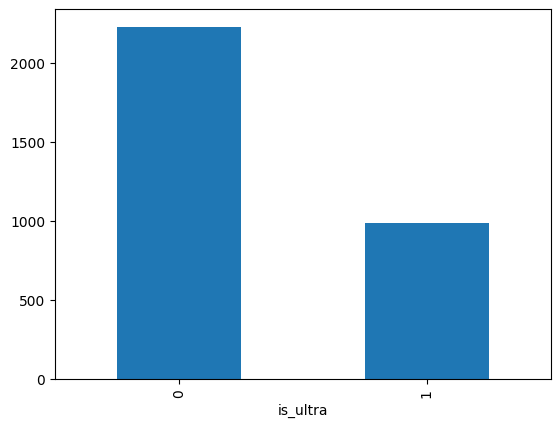

In [7]:
df['is_ultra'].value_counts().plot(kind='bar');

### Analyzing the correlation

In [8]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


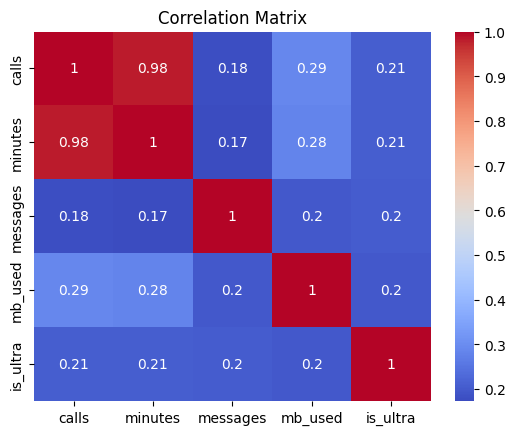

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');
plt.title('Correlation Matrix');

### Checking the distribution of columns

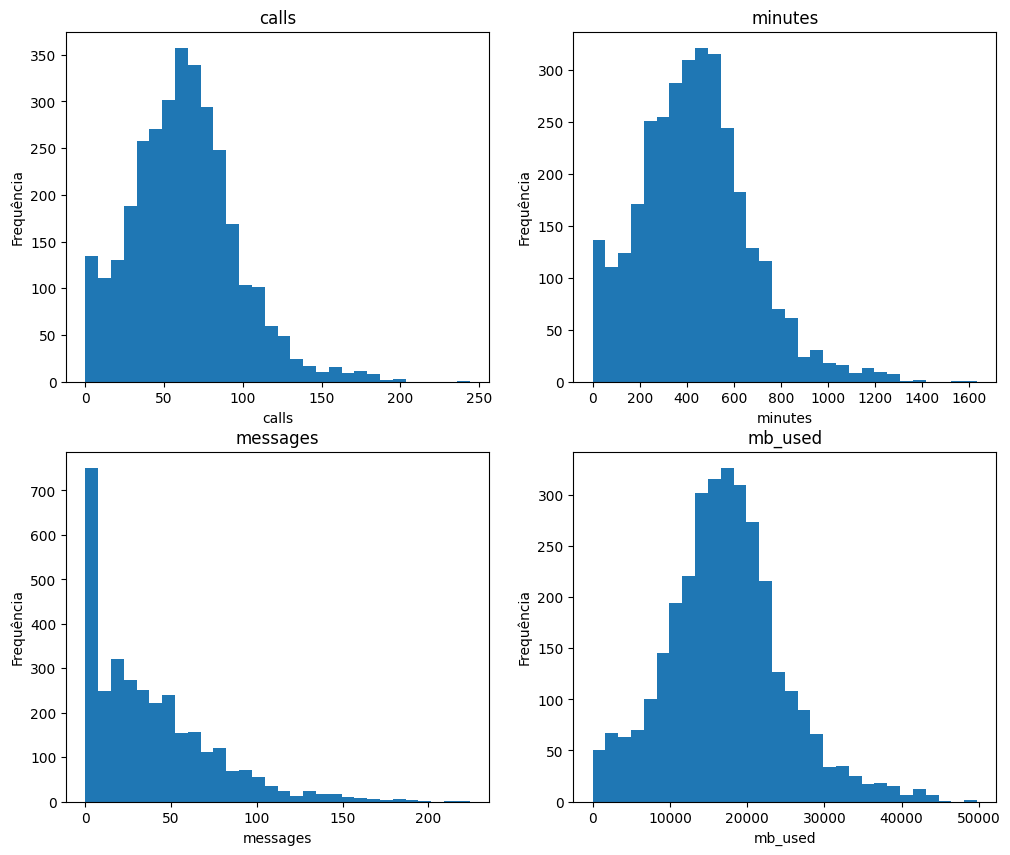

In [10]:
cols = ['calls', 'minutes', 'messages', 'mb_used']
fig , axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

### Defining the features and target

In [11]:
X = df.drop(['is_ultra'], axis=1)
y = df['is_ultra']

### Dividing the set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(X_test), len(X_val)

(2056, 643, 515)

### Checking the best model

### DecisionTree

In [14]:
best_accuracy = 0
best_depth = 0

for depth in range(1, 51):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

In [15]:
print(f'Accuracy of the best model in the validation set: {best_accuracy}')
print(f'Max tree depth: {best_depth}')

Accuracy of the best model in the validation set: 0.7980582524271844
Max tree depth: 3


Good accuracy of 0.79 using the maximum tree depth of 3, which is very good considering the speed of the model using DecisionTree.

### RandomForest

In [16]:
best_score = 0
best_est = 0

for est in range(1, 51):
    model = RandomForestClassifier(random_state=42, n_estimators=est)
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    if score > best_score:
        best_score = score
        best_est = est

In [17]:
print(f'Accuracy of the best model in the validation set: {best_score}')
print(f'n-estimators: {best_est}')

Accuracy of the best model in the validation set: 0.8038834951456311
n-estimators: 18


Good accuracy in the validation model (0.80) using n-estimators out of 18, being our best model accuracy, but sacrificing some speed using the RandomForest.

### LogisticRegression

In [18]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [19]:
score_val = model.score(X_val, y_val)

In [20]:
print(f'Validation model accuracy: {score_val}')

Validation model accuracy: 0.7495145631067961


Discard the LogisticRegression model because its accuracy in the validation model was only 0.74, the smaller one.

### Testing model quality

For this case I will use the Random Forest model as it was the tested model that obtained the highest accuracy.

Accuracy of the best model in the validation set: 0.8038834951456311

n-estimators: 18

In [21]:
model = RandomForestClassifier(random_state=42, n_estimators=18)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=18, random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.predict_proba(X_test)

array([[0.83333333, 0.16666667],
       [0.94444444, 0.05555556],
       [0.94444444, 0.05555556],
       ...,
       [0.94444444, 0.05555556],
       [0.11111111, 0.88888889],
       [0.61111111, 0.38888889]])

In [24]:
y_accuracy = accuracy_score(y_test, y_pred)

In [25]:
print(f'Model accuracy on the test set: {y_accuracy}')

Model accuracy on the test set: 0.8118195956454122


### Conclusion

We trained a model with an accuracy of 0.81, using RandomForest with n_est=18, without sacrificing much of model speed and granting a 81% accuracy.